In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [3]:
customer_df=pd.read_csv('Leads.csv')
customer_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df=customer_df.copy()
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [7]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# we will drop Lead Profile as 70% NA values.
#Will clean Data only accoring to analysis
data = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [9]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [10]:
#Looking for numericalvariables only
df_num=df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


In [12]:
df_num.describe(percentiles=[0,.25,.5,.75,.95,.99,.999,1])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


In [13]:
#CHecking for Categorical variables
df_cat=df.select_dtypes(include = ['O'])
df_cat.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,NaN,Unemployed,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,NaN,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Other,Unemployed,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified


In [15]:
#To check if the same customer is coming more than once
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [18]:
#imputing NA value in  Lead Quality with Not Sure
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

In [19]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [25]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
#Since Mumbai is having the max mode, we can replace NAN with Mumbai.
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [30]:
df_cat[["Specialization","What is your current occupation"]]

,Specialization,What is your current occupation
0,NaN,Unemployed
1,NaN,Unemployed
2,Business Administration,Student
3,Media and Advertising,Unemployed
4,NaN,Unemployed
5,NaN,NaN
6,Supply Chain Management,Unemployed
7,NaN,NaN
8,IT Projects Management,NaN
9,Finance Management,NaN


In [31]:
#We can impute the Specialization column with either others/ no specialization depending upon if the person's cousr name is not given in the list or has no specialization as he/she is a student 
data['Specialization'] = data['Specialization'].replace(np.nan, 'Other_specialization')
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [32]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [33]:
df_cat["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [34]:
df_cat["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
# Imputing tag column by 'Will revert after reading the email'.
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [36]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [37]:
df_cat["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
China                      2
Philippines                2
Uganda                     2
Italy                      2
Ghana                      2
Denmark                    1
Liberia                    1
Russia                     1
Sri Lanka                  1
Switzerland                1
Vietnam                    1
Kenya         

In [39]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [40]:
df_cat["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [41]:
data.dropna(inplace = True)

In [42]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Now that our data is cleaned, Let's proceed with EDA 

# EDA

In [43]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Inference
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [45]:
#Converted is our target variable.Lets see how many % people converted for this dataset
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

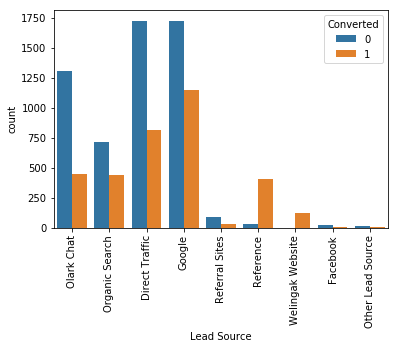

In [46]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Lead Source')
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

Inference
Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

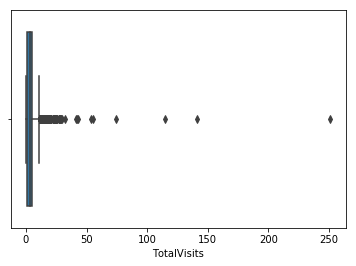

In [48]:
data['TotalVisits'].head()
sns.boxplot(data['TotalVisits'])
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

In [49]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Since we have huge jump after 95 perc, we should treat these outliers as well

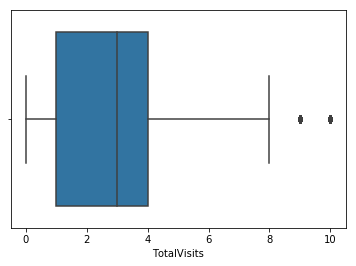

In [50]:
Q1 = data['TotalVisits'].quantile(0.05)
Q3 = data['TotalVisits'].quantile(0.95)
data = data[(data['TotalVisits'] >= Q1) & (data['TotalVisits'] <= Q3)]
sns.boxplot(data['TotalVisits'])

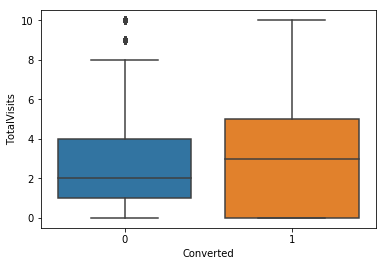

In [51]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

Inference
Median for converted and not converted leads are the same.
Nothng conclusive can be said on the basis of Total Visits

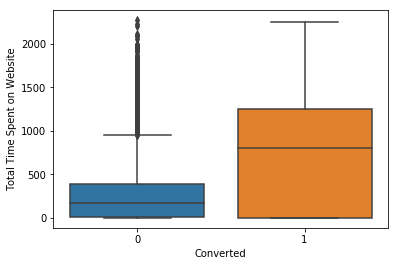

In [52]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

Inference
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

In [54]:
data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

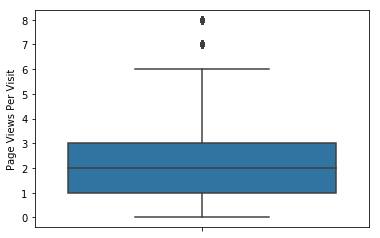

In [55]:
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[(data['Page Views Per Visit'] >= Q1) & (data['Page Views Per Visit'] <= Q3)]
sns.boxplot(y=data['Page Views Per Visit'])

Inference
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

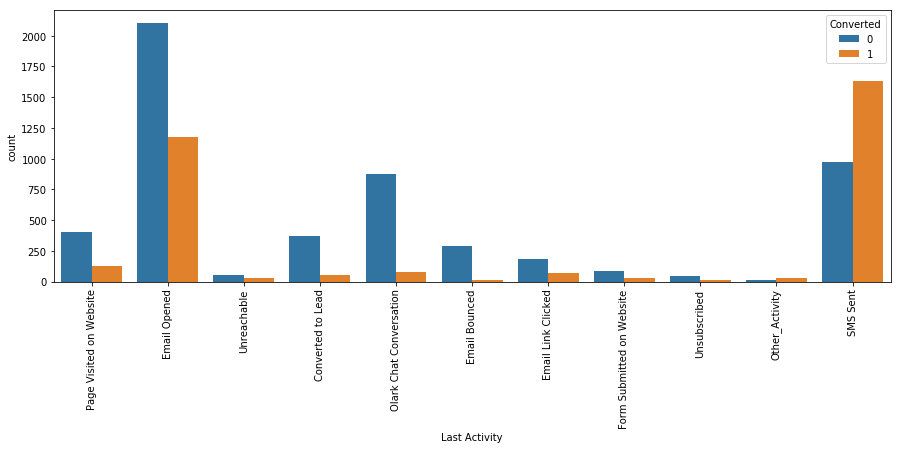

In [57]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

Inference
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.b

Inference
Focus should be more on the Specialization with high conversion rate.

Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

In [60]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

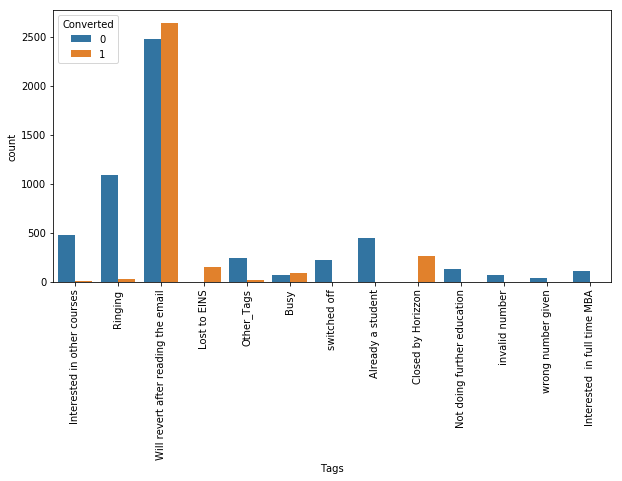

In [61]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

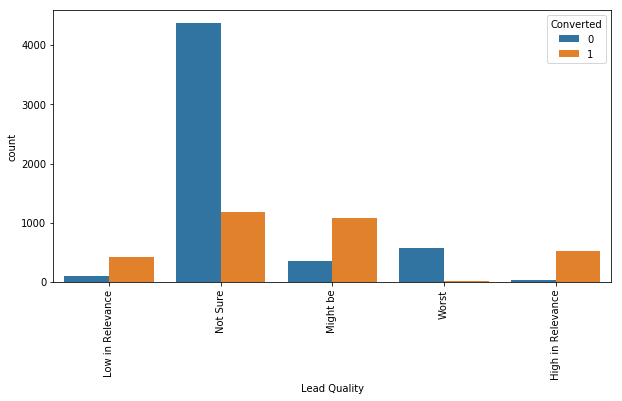

In [62]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

In [64]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8653 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        8653 non-null object
Lead Origin                        8653 non-null object
Lead Source                        8653 non-null object
Do Not Email                       8653 non-null object
Do Not Call                        8653 non-null object
Converted                          8653 non-null int64
TotalVisits                        8653 non-null float64
Total Time Spent on Website        8653 non-null int64
Page Views Per Visit               8653 non-null float64
Last Activity                      8653 non-null object
Specialization                     8653 non-null object
What is your current occupation    8653 non-null object
Tags                               8653 non-null object
Lead Quality                       8653 non-null object
City                               8653 non-null object
Last Notable Activity              8653 non-null obje

In [66]:
data = data.replace(to_replace =["no", 'yes', "No", "Yes"],  value =[0,1, 0,1])

In [67]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummys = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummys.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
# Creating the master file 

leads_df = pd.concat([data, dummys], axis=1)
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [69]:
leads_df=leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'],axis = 1)

In [70]:
# Setting up X variables

X = leads_df.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Setting up Y variables

y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# Train test spliltting 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
# Scaling the variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shashi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4556,0,0,0.047609,1.461213,0.436889,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2586,0,0,-1.191792,-0.873461,-1.210458,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8038,0,0,1.287010,0.451972,-0.386784,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5821,1,0,-0.365525,-0.549916,-0.112226,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5499,1,0,2.526412,1.499818,0.436889,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Running RFE to reduce the variables

logreg = LogisticRegression()

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe_support = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_support

[('Do Not Email', False, 4),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 60),
 ('Lead Source_Other Lead Source', False, 58),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 61),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 67),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Form Submitted on Website', False, 59),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other_Activity', False, 15),
 ('Last Activity_Page Visited on Website', False, 48),
 ('Last Activ

In [76]:
rfe_support_df = pd.DataFrame(rfe_support, columns =['Column', 'Support', 'Rank']) 
rfe_support_df.sort_values(by='Rank', ascending=False)

,Column,Support,Rank
74,Last Notable Activity_Email Received,False,71
67,City_Other Metro Cities,False,70
72,Last Notable Activity_Email Marked Spam,False,69
27,Specialization_E-Business,False,68
17,Last Activity_Email Link Clicked,False,67
33,Specialization_IT Projects Management,False,66
73,Last Notable Activity_Email Opened,False,65
80,Last Notable Activity_Resubscribed to emails,False,64
40,Specialization_Rural and Agribusiness,False,63
84,Last Notable Activity_View in browser link Cli...,False,62


In [77]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [78]:
# Now looking at the model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6041
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1504.5
Date:                Sun, 17 Nov 2019   Deviance:                       3008.9
Time:                        19:56:44   Pearson chi2:                 2.47e+04
No. Iterations:                    25   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3439      0.226     -5.959      0.000      -1.786      -0.902
Lead Origin_Lead Add Form                                1.4178      0.448      3.163      0.002       0.539       2.296
Lead Source_Welingak Website                             2.6585      0.862      3.083      0.002       0.968       4.349
What is your current occupation_Working Professional     1.2099      0.287      4.219      0.000       0.648       1.772
Tags_Busy                                                4.0452      0.334     12.125      0.000       3.391       4.699
Tags_Closed by Horizzon                                  8.4289      1.051      8.020      0.000       6.369      10.489
Tags_Lost to EINS                                       31.2835   2.73e+04      0.001      0.999   -5.35e+04    5.35e+04
Tags_Not doing further education                       -23.3359   2.95e+04     -0.001      0.999   -5.79e+04    5.78e+04
Tags_Ringing                                            -1.7830      0.324     -5.498      0.000      -2.419      -1.147
Tags_Will revert after reading the email                 3.4994      0.234     14.931      0.000       3.040       3.959
Tags_invalid number                                    -24.6852   3.97e+04     -0.001      1.000   -7.78e+04    7.78e+04
Tags_switched off                                       -2.9351      0.656     -4.476      0.000      -4.220      -1.650
Lead Quality_Not Sure                                   -3.3997      0.132    -25.707      0.000      -3.659      -3.140
Lead Quality_Worst                                      -4.2394      1.028     -4.125      0.000      -6.254      -2.225
Last Notable Activity_Modified                          -0.9086      0.110     -8.227      0.000      -1.125      -0.692
Last Notable Activity_SMS Sent                           2.3264      0.127     18.343      0.000       2.078       2.575
========================================================================================================================
"""

In [79]:
col1 = col.drop('Tags_invalid number',1)

In [80]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6042
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1510.7
Date:                Sun, 17 Nov 2019   Deviance:                       3021.4
Time:                        19:56:44   Pearson chi2:                 2.43e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5275      0.227     -6.719      0.000      -1.973      -1.082
Lead Origin_Lead Add Form                                1.4412      0.450      3.204      0.001       0.560       2.323
Lead Source_Welingak Website                             2.6316      0.863      3.050      0.002       0.940       4.323
What is your current occupation_Working Professional     1.2483      0.290      4.305      0.000       0.680       1.817
Tags_Busy                                                4.2344      0.333     12.702      0.000       3.581       4.888
Tags_Closed by Horizzon                                  8.5975      1.051      8.176      0.000       6.537      10.658
Tags_Lost to EINS                                       30.4496   1.66e+04      0.002      0.999   -3.24e+04    3.25e+04
Tags_Not doing further education                       -22.1902   1.79e+04     -0.001      0.999   -3.51e+04     3.5e+04
Tags_Ringing                                            -1.5704      0.323     -4.865      0.000      -2.203      -0.938
Tags_Will revert after reading the email                 3.6799      0.236     15.590      0.000       3.217       4.143
Tags_switched off                                       -2.7184      0.655     -4.153      0.000      -4.001      -1.435
Lead Quality_Not Sure                                   -3.3903      0.132    -25.689      0.000      -3.649      -3.132
Lead Quality_Worst                                      -4.2047      1.029     -4.087      0.000      -6.221      -2.188
Last Notable Activity_Modified                          -0.9037      0.110     -8.180      0.000      -1.120      -0.687
Last Notable Activity_SMS Sent                           2.2883      0.125     18.245      0.000       2.042       2.534
========================================================================================================================
"""

In [81]:
col2=col1.drop('Tags_Lost to EINS',1)

In [82]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6043
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1861.0
Date:                Sun, 17 Nov 2019   Deviance:                       3722.0
Time:                        19:56:44   Pearson chi2:                 1.45e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3439      0.141      2.446      0.014       0.068       0.619
Lead Origin_Lead Add Form                                1.6539      0.380      4.352      0.000       0.909       2.399
Lead Source_Welingak Website                             2.7779      0.841      3.302      0.001       1.129       4.427
What is your current occupation_Working Professional     1.1173      0.236      4.738      0.000       0.655       1.579
Tags_Busy                                                1.8837      0.260      7.256      0.000       1.375       2.393
Tags_Closed by Horizzon                                  6.1155      1.027      5.954      0.000       4.102       8.129
Tags_Not doing further education                       -24.1831    1.8e+04     -0.001      0.999   -3.54e+04    3.53e+04
Tags_Ringing                                            -3.4134      0.264    -12.928      0.000      -3.931      -2.896
Tags_Will revert after reading the email                 1.3466      0.131     10.316      0.000       1.091       1.602
Tags_switched off                                       -4.4558      0.627     -7.110      0.000      -5.684      -3.227
Lead Quality_Not Sure                                   -2.8404      0.106    -26.698      0.000      -3.049      -2.632
Lead Quality_Worst                                      -4.0793      0.409     -9.985      0.000      -4.880      -3.279
Last Notable Activity_Modified                          -0.7431      0.096     -7.720      0.000      -0.932      -0.554
Last Notable Activity_SMS Sent                           2.0831      0.116     17.931      0.000       1.855       2.311
========================================================================================================================
"""

In [83]:
col3=col2.drop('Tags_Not doing further education',1)
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6044
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1873.7
Date:                Sun, 17 Nov 2019   Deviance:                       3747.3
Time:                        19:56:44   Pearson chi2:                 1.46e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2327      0.138      1.684      0.092      -0.038       0.504
Lead Origin_Lead Add Form                                1.5530      0.366      4.239      0.000       0.835       2.271
Lead Source_Welingak Website                             2.9046      0.838      3.467      0.001       1.263       4.547
What is your current occupation_Working Professional     1.1075      0.233      4.744      0.000       0.650       1.565
Tags_Busy                                                1.9760      0.259      7.620      0.000       1.468       2.484
Tags_Closed by Horizzon                                  6.2185      1.027      6.058      0.000       4.206       8.231
Tags_Ringing                                            -3.3080      0.263    -12.584      0.000      -3.823      -2.793
Tags_Will revert after reading the email                 1.4433      0.130     11.137      0.000       1.189       1.697
Tags_switched off                                       -4.3540      0.626     -6.953      0.000      -5.581      -3.127
Lead Quality_Not Sure                                   -2.8263      0.106    -26.683      0.000      -3.034      -2.619
Lead Quality_Worst                                      -4.0866      0.406    -10.060      0.000      -4.883      -3.290
Last Notable Activity_Modified                          -0.7348      0.096     -7.669      0.000      -0.923      -0.547
Last Notable Activity_SMS Sent                           2.0917      0.116     18.010      0.000       1.864       2.319
========================================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Closed by Horizzon,1.20
3,Tags_Busy,1.12
10,Lead Quality_Not Sure,1.11
6,Tags_Not doing further education,1.10
5,Tags_Lost to EINS,1.07
9,Tags_switched off,1.03
0,Lead Origin_Lead Add Form,0.56
2,What is your current occupation_Working Profes...,0.55
12,Last Notable Activity_Modified,0.42


In [85]:
# Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

4556    0.977417
2586    0.131802
8038    0.996719
5821    0.131802
5499    0.842378
6191    0.010064
5812    0.999770
6907    0.034609
7594    0.377047
5722    0.131802
7047    0.002728
6593    0.977417
3698    0.069553
4802    0.719379
7175    0.719379
dtype: float64

In [86]:
# Creating a data frame with the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
4556,1,0.977417,4556
2586,0,0.131802,2586
8038,1,0.996719,8038
5821,0,0.131802,5821
5499,1,0.842378,5499
6191,0,0.010064,6191
5812,1,0.999770,5812
6907,0,0.034609,6907
7594,0,0.377047,7594
5722,0,0.131802,5722


In [87]:
# Creating new column 'predicted' Lead conversion Probaility > 0.8

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
4556,1,0.977417,4556,1
2586,0,0.131802,2586,0
8038,1,0.996719,8038,1
5821,0,0.131802,5821,0
5499,1,0.842378,5499,1


In [88]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3721   60]
 [ 867 1409]]


In [89]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8469539375928677


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# sensitivity

TP / float(TP+FN)

0.6190685413005272

In [92]:
# specificity

TN / float(TN+FP)

0.9841311822269241

In [93]:
# False postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.015868817773075906


In [94]:
# positive predictive value 

print (TP / float(TP+FP))

0.9591558883594282


In [95]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8110287707061901


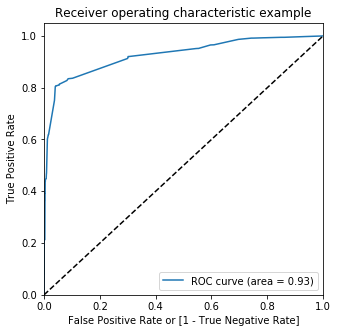

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition the area under the ROC curve gives an idea about the benefit of using the test(s) in question.

1. It shows the tradeoff between sensitivity and specificity
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
# Optimal Cutoff Point
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4556,1,0.977417,4556,1,1,1,1,1,1,1,1,1,1,1
2586,0,0.131802,2586,0,1,1,0,0,0,0,0,0,0,0
8038,1,0.996719,8038,1,1,1,1,1,1,1,1,1,1,1
5821,0,0.131802,5821,0,1,1,0,0,0,0,0,0,0,0
5499,1,0.842378,5499,1,1,1,1,1,1,1,1,1,1,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375764  1.000000  0.000000
0.1   0.1  0.638930  0.951670  0.450674
0.2   0.2  0.782070  0.920475  0.698757
0.3   0.3  0.883606  0.834798  0.912986
0.4   0.4  0.895823  0.814148  0.944988
0.5   0.5  0.894832  0.810633  0.945517
0.6   0.6  0.900611  0.806678  0.957154
0.7   0.7  0.901601  0.804921  0.959799
0.8   0.8  0.846954  0.619069  0.984131
0.9   0.9  0.788014  0.448594  0.992330


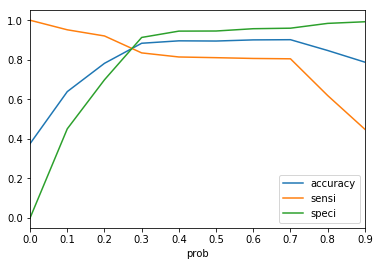

In [99]:
#Accuracy, Specificity and Sensitivity for various probablities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4556,1,0.977417,4556,1,1,1,1,1,1,1,1,1,1,1,1
2586,0,0.131802,2586,0,1,1,0,0,0,0,0,0,0,0,0
8038,1,0.996719,8038,1,1,1,1,1,1,1,1,1,1,1,1
5821,0,0.131802,5821,0,1,1,0,0,0,0,0,0,0,0,0
5499,1,0.842378,5499,1,1,1,1,1,1,1,1,1,1,0,1


In [101]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
4556,1,0.977417,4556,1,1,1,1,1,1,1,1,1,1,1,1,98
2586,0,0.131802,2586,0,1,1,0,0,0,0,0,0,0,0,0,13
8038,1,0.996719,8038,1,1,1,1,1,1,1,1,1,1,1,1,100
5821,0,0.131802,5821,0,1,1,0,0,0,0,0,0,0,0,0,13
5499,1,0.842378,5499,1,1,1,1,1,1,1,1,1,1,0,1,84


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.883605745418524

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3452,  329],
       [ 376, 1900]], dtype=int64)

In [104]:
# Sensitivity 

TP / float(TP+FN)

0.6190685413005272

In [105]:
# Specifity 

TN / float(TN+FP)

0.9841311822269241

In [106]:
# False Positive Rate

print(FP/ float(TN+FP))

0.015868817773075906


In [107]:
# Positive predictive value 

print (TP / float(TP+FP))

0.9591558883594282
